# What is the True Normal Human Body Temperature? 

#### Background

The mean normal body temperature was held to be 37$^{\circ}$C or 98.6$^{\circ}$F for more than 120 years since it was first conceptualized and reported by Carl Wunderlich in a famous 1868 book. But, is this value statistically correct?

## Solution summary

Temperature data are almost normal. Histogram has some binning bias which can be neglected as CDF is closely packed with normal distribution curve. Also, mean value is 98.25 and median value is 98.3, which are very close as the two should be same for normal distribution. Skewness is -0.004 and Kurtosis is 0.7, which are on the lower side. Ideally they should be zero for normal distribution.

Sample is large enough with 130 observations. It is independent as all data points are captured for specific individual and do not correlate to any other person.

Conceptualized body temperature is 98.6 F. However, different tests suggest otherwise. Let's test this as a null hypothesis testing. 

#### Null hypothesis - sample data has same mean as population mean.

Bootstrap test: pvalue is 0. One sample t test: t statistic is -5.45, pvalue is 2.41e-07. z test produced z value of -5.46 and pvalue of 4.58e-08. 
Since the population variance is unknown, it is best to use one sample t test. Also, z test produces similar result with very low p value. Both these test can be interchanged for large sample size. However, t test is best for smaller sample size.

If we draw a sample of 10 from existing data, t test produces a pvalue of 0.038 and z test has a pvalue of 0.01. Clearly t test is better suited here and we can reject the null hypothesis with for 5% significance level. We would fail to do so if significance level were 1%. t test is a better option for sample size of 10.

The margin of error for 95 confidence in given sample is 1.43. Confidence interval ranges from 96.81 F - 99.68 F. This implies the conceptualize mean body temperature of 98.6 F is not an abnormal value.

#### Compare male and female data

When male and female body temperatures are compared in the given sample, we hypothesize - male and female body temperatures are the same. 
With two sample t test, we conclude the mean for two are not similar with 5% significance, pvalue of 0.023. Hence we reject the null hypothesis. Mean female body temperature is greater than mean male temperature by 0.29 F. 

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
import numpy as np
from scipy import stats
%matplotlib inline
sns.set()

df = pd.read_csv('data/human_body_temperature.csv')

In [2]:
df.head()

,temperature,gender,heart_rate
0,99.3,F,68.0
1,98.4,F,81.0
2,97.8,M,73.0
3,99.2,F,66.0
4,98.0,F,73.0


In [3]:
def ecdf(data):
    x = np.sort(data)
    y = np.arange(1, len(x) + 1) / len(x)
    return x, y

def bootstrap_replicate_1d(data, func):
    bs_sample = np.random.choice(data, size=len(data))
    return func(bs_sample)

def draw_bs_reps(data, func, size=1):
    bs_replicates = np.empty(size)
    for i in range(size):
        bs_replicates[i] = bootstrap_replicate_1d(data, func)
    return bs_replicates

def permutation_sample(data1, data2):
    data = np.concatenate((data1, data2))
    permuted_data = np.random.permutation(data)
    perm_sample_1 = permuted_data[:len(data1)]
    perm_sample_2 = permuted_data[len(data2):]
    return perm_sample_1, perm_sample_2

def diff_of_means(data1, data2):
    return (np.mean(data1) - np.mean(data2))

def draw_perm_reps(data1, data2, func, size=1):
    perm_replicates = np.empty(size)
    for i in range(size):
        perm_sample_1, perm_sample_2 = permutation_sample(data1, data2)
        perm_replicates[i] = func(perm_sample_1, perm_sample_2)
    return perm_replicates

def diff_from_pop_mean(data, pop_mean=98.6):
    return np.mean(data) - pop_mean

def t_statistic(data, mean, std):
    return (np.mean(data) - mean) / (std/np.sqrt(len(data)))

# 1. Test for normality


In [4]:
# Calculate sample statistics
# Sample is 130 data points in dataframe for temperature column

sample = df.temperature

sample_mean = df.temperature.mean().round(2)
sample_std = df.temperature.std().round(2)
sample_median = df.temperature.median().round(2)

x_normal, y_normal = ecdf(np.random.normal(sample_mean, sample_std, size = 10000))


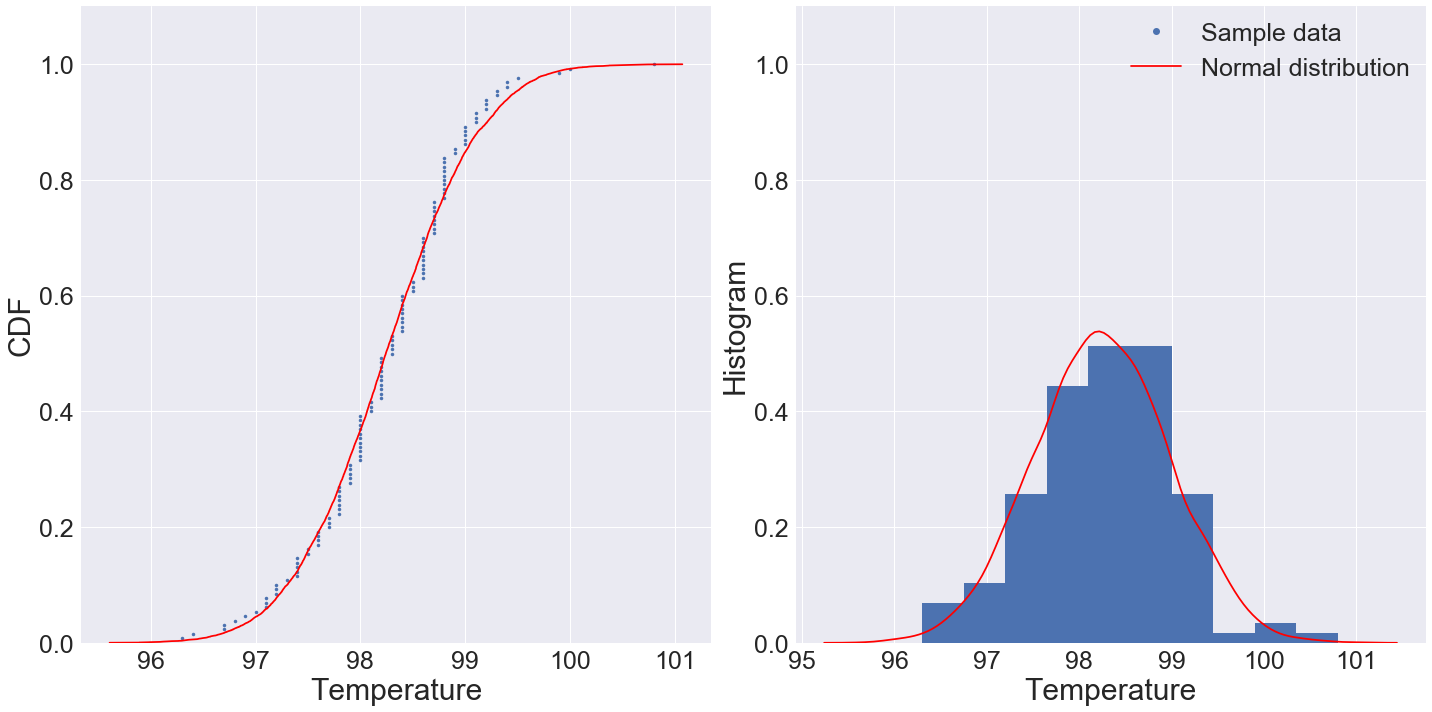

In [5]:
# Plot CDF and histogram along with optimal lines (in red) 

x, y = ecdf(df.temperature)
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 10))

ax1.plot(x, y, marker='.', linestyle='none')
ax1.plot(x_normal, y_normal, color='r')

ax2.hist(x, bins=10, density=True)
sns.distplot(x_normal, bins=None, color='r', ax=ax2, hist=False)

#ax1.set_xticklabels('')
ax1.tick_params(axis='both', which='major', labelsize=25)
ax1.tick_params(axis='both', which='minor', labelsize=25)
ax1.set_title('', fontdict={'fontsize': 30})
ax1.set_ylim(ymin=0, ymax=1.1)
ax1.set_xlabel('Temperature', fontdict={'fontsize': 30})
ax1.set_ylabel('CDF', fontdict={'fontsize': 30})

#ax1.set_xticklabels('')
ax2.tick_params(axis='both', which='major', labelsize=25)
ax2.tick_params(axis='both', which='minor', labelsize=25)
ax2.set_title('', fontdict={'fontsize': 30})
ax2.set_ylim(ymin=0, ymax=1.1)
ax2.set_xlabel('Temperature', fontdict={'fontsize': 30})
ax2.set_ylabel('Histogram', fontdict={'fontsize': 30})
fig.legend(['Sample data', 'Normal distribution'], loc='upper right', fontsize=25, markerscale = 2)

fig.tight_layout()

In [6]:
print('Sample mean temperature value is', sample_mean)
print('Sample median temperature value is', sample_median)
print('Skewness of temperature distribution is', stats.skew(df.temperature))
print('Kurtosis of temperature distribution is', stats.kurtosis(df.temperature))

Sample mean temperature value is 98.25
Sample median temperature value is 98.3
Skewness of temperature distribution is -0.004367976879081625
Kurtosis of temperature distribution is 0.7049597854114693


# 2. Is the sample size large? Are the observations independent?


Sample size is 130, which is significantly greater than 30 (ideal minimum sample size). Observations are independent as every row corresponds to an individual and feature values are not dependent other rows.

# 3. Is the true population mean really 98.6 degrees F?

Null hypothesis: The sample mean body temperature is equal to the normal population mean of 98.6 F



In [7]:
# Shift sample data towards population mean
population_mean = 98.6
sample_data = df.temperature
shift_sample_data = sample_data - sample_mean + population_mean

# Observed difference between original sample data and population mean
diff_observed = diff_from_pop_mean(sample_data, population_mean)

# Bootstrap shifted data
bs_replicates = draw_bs_reps(shift_sample_data, diff_from_pop_mean, 10000)

# Calculate probability
p = np.sum(bs_replicates <= diff_observed) / len(bs_replicates)
p

0.0

One sample test because we have one set of data to be matched against population mean. t-test because population variance is unknown



In [8]:
# Run one sample t test with sample data and population mean
stats.ttest_1samp(sample_data, population_mean)

Ttest_1sampResult(statistic=-5.4548232923645195, pvalue=2.4106320415561276e-07)

In [9]:
# Above is similar to one sample t test of difference from population mean approaching zero
diff_mean = sample_data - population_mean
stats.ttest_1samp(diff_mean, 0)

Ttest_1sampResult(statistic=-5.454823292364207, pvalue=2.410632041559576e-07)

In [10]:
# Calculate z statistic
z = (sample_mean - population_mean) / (sample_std / np.sqrt(len(sample)))
z

-5.466594503899888

In [11]:
# Probability for z value will be twice as z score could fall on either tail
p = 2 * stats.norm.cdf(z)
p

4.587638864121873e-08

# 4. Draw a small sample of size 10 from the data and repeat both frequentist tests.


In [12]:
# Generate seed and draw 10 random samples from original sample
np.random.seed(145)
sample_10 = np.random.choice(df.temperature, size=10)

In [13]:
# Run one sample t test with sample_10 and population mean
stats.ttest_1samp(sample_10, population_mean)

Ttest_1sampResult(statistic=-2.424915040727563, pvalue=0.03830065026376261)

In [14]:
# Above is similar to one sample t test of difference from population mean approaching zero
diff_mean = sample_10 - population_mean
stats.ttest_1samp(diff_mean, 0)

Ttest_1sampResult(statistic=-2.4249150407276217, pvalue=0.03830065026375892)

In [15]:
# Calculate z statistic
z = (np.mean(sample_10) - population_mean) / (np.std(sample_10) / np.sqrt(len(sample_10)))
z

-2.556084887033023

In [16]:
# Probability for z value will be twice as z score could fall on either tail
p = 2 * stats.norm.cdf(z)
p

0.01058572913988251

# 5. At what temperature should we consider someone's temperature to be "abnormal"?


In [17]:
# Margin of error for N draws with 95% confidence

z = stats.norm.ppf(.975)
margin_error = z * sample_std/np.sqrt(len(sample_data))
margin_error

0.12548715550414832

In [18]:
# Margin of error for 1 draw with 95% confidence

z = stats.norm.ppf(.975)
margin_error = z * sample_std
margin_error

1.4307737087142394

In [19]:
# 95% confidence interval for 1 draw

[sample_mean + stats.norm.ppf(.025) * sample_std, sample_mean + stats.norm.ppf(.975) * sample_std]

[96.81922629128576, 99.68077370871424]

In [20]:
# Above can also be calculated using this formula

stats.norm.interval(0.95, loc=sample_mean, scale=sample_std)

(96.81922629128576, 99.68077370871424)

# 6.Is there a significant difference between males and females in normal temperature?


In [21]:
# Generate male and female dataset
male_data = df[df.gender == 'M'].temperature
female_data = df[df.gender == 'F'].temperature

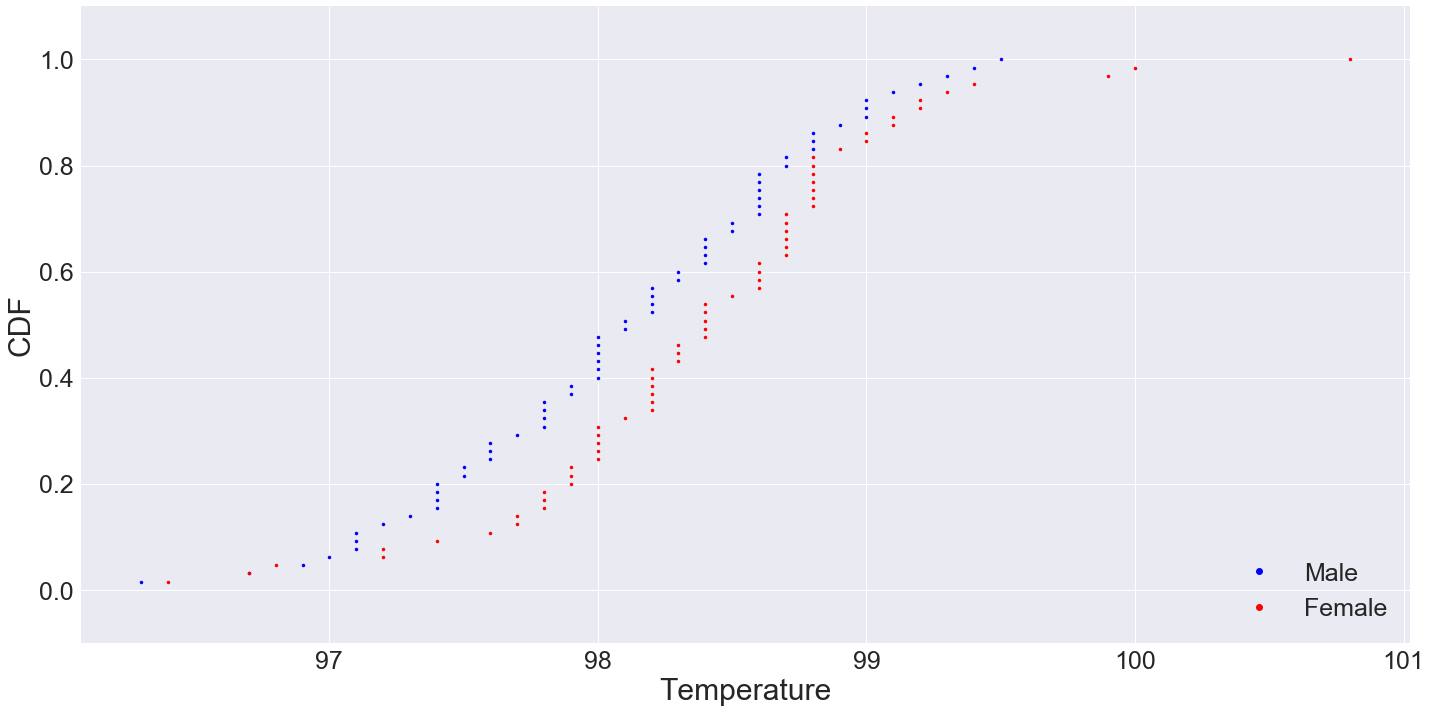

In [22]:
# Plot male and female cdf for visual analysis

xm, ym = ecdf(male_data)
xf, yf = ecdf(female_data)

fig, ax = plt.subplots(figsize=(20, 10))

ax.plot(xm, ym, marker='.', linestyle='none', color = 'b')
ax.plot(xf, yf, marker='.', linestyle='none', color = 'r')

#ax1.set_xticklabels('')
ax.tick_params(axis='both', which='major', labelsize=25)
ax.tick_params(axis='both', which='minor', labelsize=25)
ax.set_title('', fontdict={'fontsize': 30})
ax.set_ylim(ymin=-0.1, ymax=1.1)
ax.set_xlabel('Temperature', fontdict={'fontsize': 30})
ax.set_ylabel('CDF', fontdict={'fontsize': 30})
ax.legend(['Male', 'Female'], loc='lower right', fontsize=25, markerscale = 2)

fig.tight_layout()

In [23]:
# Test statistic is difference in means of male and female temperatures
observed_diff = diff_of_means(male_data, female_data)

#Draw permutation replicates of difference in means
perm_replicates = draw_perm_reps(male_data, female_data, diff_of_means, 10000)

# Calculate probability
p = np.sum(perm_replicates <= observed_diff) / len(perm_replicates)
p

0.0122

In [24]:
# Another method to compare two datasets is 2 sample t test
stats.ttest_ind(male_data, female_data)

Ttest_indResult(statistic=-2.2854345381656103, pvalue=0.02393188312239561)

In [25]:
male_data.describe()

count    65.000000
mean     98.104615
std       0.698756
min      96.300000
25%      97.600000
50%      98.100000
75%      98.600000
max      99.500000
Name: temperature, dtype: float64

In [26]:
female_data.describe()

count     65.000000
mean      98.393846
std        0.743488
min       96.400000
25%       98.000000
50%       98.400000
75%       98.800000
max      100.800000
Name: temperature, dtype: float64